In [37]:
import pandas as pd
import matplotlib as plt
# from pyecharts import options as opts
# from pyecharts.charts import Bar
plt.rc('font',family='Times New Roman')
idx=3
train_acc = pd.read_csv(f'./output/{idx}/train_acc.txt',header=None).values.flatten()
val_acc = pd.read_csv(f'./output/{idx}/val_acc.txt',header=None).values.flatten()
train_loss = pd.read_csv(f'./output/{idx}/train_loss.txt',header=None).values.flatten()
val_loss = pd.read_csv(f'./output/{idx}/val_loss.txt',header=None).values.flatten()

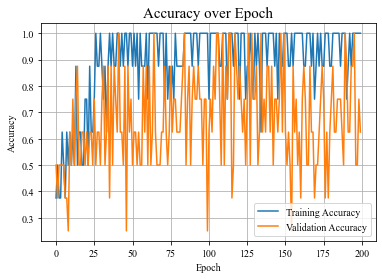

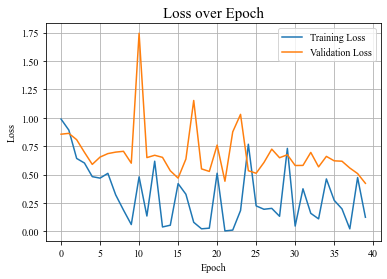

In [38]:
import matplotlib.pyplot as plt

# 设置图形尺寸
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epoch',size=15)
plt.grid()
plt.savefig('5.png')
plt.show()
plt.clf()
plt.plot(train_loss[::5], label='Training Loss')
plt.plot(val_loss[::5], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.title('Loss over Epoch',size=15)
plt.savefig('6.png')
# 显示图形
plt.show()

In [26]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
labels=pd.read_csv(f'./output/{idx}/labels.txt',sep='\t',header=None)
predict=labels[0].values
groundtruth=labels[1].values

In [27]:
# label_column = ['ACO', 'GA', 'TS', 'SA']
label_column = ['ACO', 'GA']
report=classification_report(groundtruth, predict,target_names=label_column,output_dict=True)
report = pd.DataFrame(report)
report.to_csv('output/result.csv')
report

,ACO,GA,accuracy,macro avg,weighted avg
precision,0.744035,0.831858,0.78125,0.787947,0.787947
recall,0.857500,0.705000,0.78125,0.781250,0.781250
f1-score,0.796748,0.763194,0.78125,0.779971,0.779971
support,800.000000,800.000000,0.78125,1600.000000,1600.000000


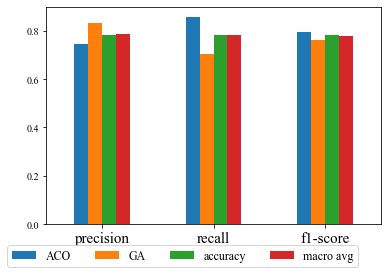

In [28]:
plt.figure(figsize=(6,4))
report.T.iloc[:4,:3].T.plot.bar(rot=0,ax=plt.gca())
plt.legend(fontsize=12,bbox_to_anchor=(0.95,-0.07),ncol=4)
plt.xticks(size=15)
plt.show()

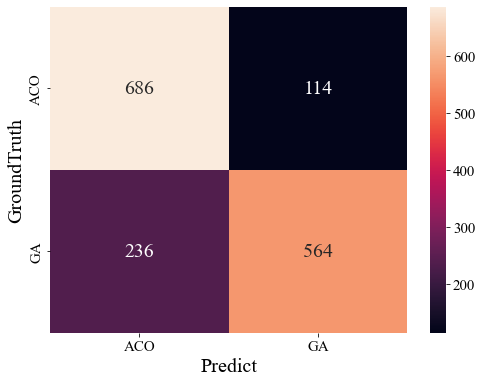

In [29]:
cm = confusion_matrix(groundtruth, predict)#混淆矩阵
#annot = True 格上显示数字 ，fmt：显示数字的格式控制
ax = sns.heatmap(cm,annot=True,fmt='g',xticklabels=label_column,yticklabels=label_column,annot_kws={"fontsize":20})
#xticklabels、yticklabels指定横纵轴标签
ax.set_xlabel('Predict',size=20) #x轴
ax.set_ylabel('GroundTruth',size=20) #y轴
plt.xticks(fontsize=15) #x轴刻度的字体大小（文本包含在pd_data中了）
plt.yticks(fontsize=15) #y轴刻度的字体大小（文本包含在pd_data中了）
plt.gcf().set_size_inches(8, 6)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)
plt.show()

In [30]:
acc = metrics.accuracy_score(groundtruth, predict)
precision = metrics.precision_score(groundtruth, predict, zero_division=1 )
recall = metrics.recall_score(groundtruth, predict)
f1 = metrics.f1_score(groundtruth, predict)
tn, fp, fn, tp = metrics.confusion_matrix(groundtruth, predict).ravel()
ppv = tp/(tp+fp+1.4E-45)
npv = tn/(fn+tn+1.4E-45)
mcc=metrics.matthews_corrcoef(groundtruth, predict)
item={'Accuracy':acc,'Precision':precision,'MCC':mcc,'PPV':ppv,'NPV':npv,'Recall':recall,'F1':f1,'TP':tp,'FP':fp,'TN':tn,'FN':fn}
res = pd.DataFrame([item])
res.to_csv('output/1.csv',index=False)
res

,Accuracy,Precision,MCC,PPV,NPV,Recall,F1,TP,FP,TN,FN
0,0.78125,0.831858,0.569157,0.831858,0.744035,0.705,0.763194,564,114,686,236
